Tristan J. Hillis <br/>
ID: 1260315  <br/>
Astro 425 | Homework #2 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

We can find the total brightness by using our known radius for one of the stars.  Only some of a star's light is painted on a concentric shell in our point of view but because flux is constant the flux at the surface of one of the stars will also be the same for the concentric shell of size r; that we are trying to find.  

We have the flux of one of the stars is: $$ f_* = \frac{ L_\odot }{ 4\pi R_*^2 } $$ <br/>
$$ f_* = \frac{ 3.8e26 \;W }{ 4\pi(7e8\;m)^2 } $$ <br/>
$$ f_* = 61,713,141.20 \; \frac{W}{m^2}$$ <br/>
This value is then equal to the quantity the total brightness, J, which is givin as the following:
$$ J = \frac{ nL }{ 4 \pi } \int_0^r dr $$ <br/>
$$ J = \frac{ nLr }{4 \pi} $$ <br/>
Solving for r:  $$ r = \frac{ 4\pi J }{nL} $$ <br/>
Plugging in all the associated values ($n = 10^9 \;Mpc^{-3}$):
$$ r = \frac{ 4\pi(61713141.20) }{ 10^9(3.8e26) } \left(\frac{ W\ Mpc^{-3} }{ W\ m^2 }\right) \left( \frac{3.086e22\ m}{1\ Mpc} \right)^2 $$ <br/>
$$ \boxed{ r = 1.94e18 \;Mpc }$$ <br/>

Considering that the Hubble distance is $4300 \; Mpc$ the distance above is MUCH larger, which makes sense considering that an assumption of the Olberian Universe is that it is infinite.  So one would expect to see essentially infinite distance.


# Problem 2

Relative percentage error(RPE) $ = 100 \times{\frac{ H_o^H - H_o }{ H_o }}$, where $H_o^H$ is Hubble's measurement of the Hubble Constant.  This yields a relative error of: $$ \boxed{RPE = 614.3 \%} $$ If we assume all the error was in the estimation of the Cepheid distance measurement, his relative error of estimating the distances was off by the amount above.  

Now if we hypotheically had a Hubble Constant of 500 km/s/Mpc but knew the universe was indeed ~13.7 Gyr then we would have to reconcile this with the fact the universe is accelerating, and heavily too.  The Hubble Time does not necessarily give the age of the universe, rather it would barring any kind of accelerations.  This means the universe would have had to accelerate more in the past to reach what would be a Hubble Constant of 500 km/s/Mpc.



# Problem 3

We start with the metric $ ds^2 $ for a sphere, or postivie curvature space. 
$$ ds^2 = dr^2 + R^2\sin^2{(r/R)}d\theta^2 $$ Solving for $d\theta$ gives:
$$ d\theta = \frac{ \sqrt{ ds^2 - dr^2 } }{ R\sin{(r/R)} } $$
Now we know that we live on the surface of this sphere and thusly distances are only measured on the surface (as the problem tells us) meaning $dr=0$.  That gives us: $$ \boxed{d\theta = \frac{ ds }{ R\sin{(r/R)} }} $$

As $ r \rightarrow \pi R $ we can see that $ \sin{ (r/R) } \rightarrow 0 $, making $ \boxed{d\theta \rightarrow \infty}$.  That is the angular size of the object goes to $\infty$.

# Problem 4 

I performed a simple Euler's method to compute numerically integrate the equation $ \dot a = H_o a^{-3} $.  The algebraic equation, solved with seperable differential equations, is as follows: $$ a = \left( \frac{5}{2} H_ot \right)^{2/5} $$
Below is a plot of algebraic and numerical solutions overlayed, whose color is given by the legend.  With the Euler method I was unable to star my initial guess at 0 due to nature of the diffy q.  So I gave a number close to 0, and if a higher accuracy is attempted then time of calculation becomes cumbersome.

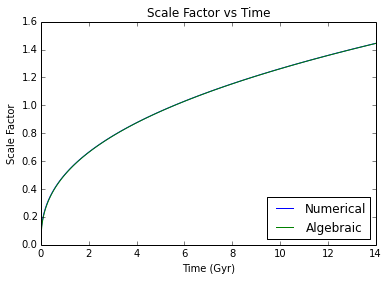

In [52]:
# Problem 4 code.

H = 2.2685 * 10 ** -18 # s -1
H1=0.071539416 # Gyr -1

def func(x): # differential equation
    return H1 * x ** (-3.0 / 2)


#### Use Euler's Method for numerical integration
step = 0.001
t3 = np.arange(0,14,step)
t2 = np.linspace(0, 4.41504e17, 1000)

y = np.array([0.01]) # initial condition at our time is ~0
currentSlope = func(y[0])
for i in range(1, t3.size):
    y = np.append(y, y[i - 1] + step * currentSlope)
    currentSlope = func(y[i])


plt.plot(t3, y, label="Numerical")
#####

# Algebraic see the cell above for derivation.
a = (5.0 / 2.0 * H * t2) ** (2.0/5.0)

plt.plot(t2/(10.0**9*365*24*60*60), a, label="Algebraic") # change to space on

plt.xlabel("Time (Gyr)")
plt.ylabel("Scale Factor")
plt.title("Scale Factor vs Time")
plt.legend(loc=4)





